In [28]:
#SVM with first dataset
import numpy as np

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix # for confusion matrix

In [30]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maitreyee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [32]:
fake_news_data = pd.read_csv('train.csv')

In [33]:
fake_news_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [34]:
#number of rows and columns in the dataset
fake_news_data.shape

(20800, 5)

In [35]:
#getting the statistical measures of the dataset
fake_news_data.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [36]:
fake_news_data['label'].value_counts()

label
1    10413
0    10387
Name: count, dtype: int64

1 --> fake news

0 --> real news

In [37]:
fake_news_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [38]:
#fake_news_data['author'].isnull().sum()

In [39]:
fake_news_data_cleaned= fake_news_data.dropna(subset=['text', 'title'])

In [40]:
#fake_news_data_cleaned= fake_news_data.dropna(subset=['author'])

In [41]:
#fake_news_data_cleaned.isnull().sum()

In [42]:
#fake_news_data_cleaned= fake_news_data.dropna(subset=['author', 'title'])

In [43]:
fake_news_data_cleaned.isnull().sum()

id           0
title        0
author    1918
text         0
label        0
dtype: int64

In [44]:
#number of rows and columns in the dataset
fake_news_data_cleaned.shape

(20203, 5)

In [45]:
fake_news_data_cleaned['label'].value_counts()

label
0    10387
1     9816
Name: count, dtype: int64

In [46]:
#fake_news_data_cleaned = fake_news_data_cleaned.fillna('')

In [47]:
fake_news_data_cleaned.isnull().sum()

id           0
title        0
author    1918
text         0
label        0
dtype: int64

In [48]:
fake_news_data_cleaned['content'] = fake_news_data_cleaned['title']+' '+fake_news_data_cleaned['text']

C:\Users\Maitreyee\AppData\Local\Temp\ipykernel_1144\2846383310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news_data_cleaned['content'] = fake_news_data_cleaned['title']+' '+fake_news_data_cleaned['text']


In [49]:
print(fake_news_data_cleaned['content'])

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2        Why the Truth Might Get You Fired Why the Trut...
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799    What Keeps the F-35 Alive   David Swanson is a...
Name: content, Length: 20203, dtype: object


In [50]:
# seperating the features and target

features = fake_news_data_cleaned.drop(columns='label', axis=1)

target = fake_news_data_cleaned['label']

In [51]:
print(features)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [52]:
print(target)

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20203, dtype: int64


In [53]:
'''import pandas as pd
from nltk.stem import PorterStemmer
import pickle

# Function to stem a dataset
def stem_dataset(dataset, text_column):
    stemmer = PorterStemmer()
    dataset[text_column + '_stemmed'] = dataset[text_column].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
    return dataset

# Sample data (assuming you have a CSV file)
dataset_path = '/path/to/your/dataset.csv'
text_column_name = 'text'  # Assuming 'text' is the column containing text data

# Load dataset
dataset = pd.read_csv(dataset_path)

# Stem the text data
stemmed_dataset = stem_dataset(dataset, text_column_name)

# Save the stemmed output using pickle
output_path = '/path/to/save/stemmed_dataset.pkl'
with open(output_path, 'wb') as f:
    pickle.dump(stemmed_dataset, f)

print("Stemmed dataset saved at:", output_path) '''


'import pandas as pd\nfrom nltk.stem import PorterStemmer\nimport pickle\n\n# Function to stem a dataset\ndef stem_dataset(dataset, text_column):\n    stemmer = PorterStemmer()\n    dataset[text_column + \'_stemmed\'] = dataset[text_column].apply(lambda x: \' \'.join([stemmer.stem(word) for word in x.split()]))\n    return dataset\n\n# Sample data (assuming you have a CSV file)\ndataset_path = \'/path/to/your/dataset.csv\'\ntext_column_name = \'text\'  # Assuming \'text\' is the column containing text data\n\n# Load dataset\ndataset = pd.read_csv(dataset_path)\n\n# Stem the text data\nstemmed_dataset = stem_dataset(dataset, text_column_name)\n\n# Save the stemmed output using pickle\noutput_path = \'/path/to/save/stemmed_dataset.pkl\'\nwith open(output_path, \'wb\') as f:\n    pickle.dump(stemmed_dataset, f)\n\nprint("Stemmed dataset saved at:", output_path) '

In [54]:
port_stem= PorterStemmer()

In [55]:
def stemming(content):   #stemming is a function here
  stemmed_content = re.sub('[^a-zA-z]',' ',content)       #removes everything that is not btw aA-zZ(all numbers and puntuations replaced by space)
  stemmed_content = stemmed_content.lower()                #converts all uc to lc to avoid problem during processing
  stemmed_content = stemmed_content.split()                #all words and text will be splitted and converted to list
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [56]:
fake_news_data_cleaned['content'] = fake_news_data_cleaned['content'].apply(stemming)

C:\Users\Maitreyee\AppData\Local\Temp\ipykernel_1144\437390764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news_data_cleaned['content'] = fake_news_data_cleaned['content'].apply(stemming)


In [65]:
import pickle

# Assuming 'fake_news_data_cleaned' is your DataFrame containing the stemmed content

# Define the output file path
output_file = "stemmed_fake_news_data.pkl"

# Save the DataFrame containing the stemmed content using pickle
with open(output_file, "wb") as f:
    pickle.dump(fake_news_data_cleaned, f)

print("Stemmed fake news data saved to:", output_file)


Stemmed fake news data saved to: stemmed_fake_news_data.pkl


In [66]:
import pickle

# Define the path to the pickle file
pickle_file_path = "stemmed_fake_news_data.pkl"

# Load the DataFrame from the pickle file
with open(pickle_file_path, "rb") as f:
    stemmed_fake_news_data = pickle.load(f)

# Now you can use 'stemmed_fake_news_data' as your DataFrame containing the stemmed content
# For example, you can access columns, perform further analysis, or save it to another format
print(stemmed_fake_news_data.head())


   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1  Ever get the feeling your life circles the rou...      0   
2  Why the Truth Might Get You Fired October 29, ...      1   
3  Videos 15 Civilians Killed In Single US Airstr...      1   
4  Print \nAn Iranian woman has been sentenced to...      1   

                                             content  
0  hous dem aid even see comey letter jason chaff...  
1  flynn hillari clinton big w

In [67]:
print(fake_news_data_cleaned['content'])

0        hous dem aid even see comey letter jason chaff...
1        flynn hillari clinton big woman campu breitbar...
2        truth might get fire truth might get fire octo...
3        civilian kill singl us airstrik identifi video...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795    rapper trump poster child white supremaci rapp...
20796    n f l playoff schedul matchup odd new york tim...
20797    maci said receiv takeov approach hudson bay ne...
20798    nato russia hold parallel exercis balkan nato ...
20799    keep f aliv david swanson author activist jour...
Name: content, Length: 20203, dtype: object


In [58]:
'''#seperating the data and the label
features = fake_news_data_cleaned['content'].values
target = fake_news_data_cleaned['label'].values'''

"#seperating the data and the label\nfeatures = fake_news_data_cleaned['content'].values\ntarget = fake_news_data_cleaned['label'].values"

In [68]:
#seperating the data and the label
features = stemmed_fake_news_data['content'].values
target = stemmed_fake_news_data['label'].values

In [69]:
print(features)

['hous dem aid even see comey letter jason chaffetz tweet hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel case know an

In [70]:
print(target)

[1 0 1 ... 0 1 1]


In [71]:
target.shape

(20203,)

In [72]:
#converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(features)

features =vectorizer.transform(features)

In [73]:
print(features)

  (0, 109850)	0.05001417052334059
  (0, 109798)	0.01915628925310019
  (0, 108846)	0.04478795063167457
  (0, 108842)	0.09611164254336423
  (0, 108798)	0.03794631396404217
  (0, 108758)	0.011387610991409091
  (0, 108113)	0.017291964598269833
  (0, 107299)	0.017297834920508945
  (0, 107211)	0.01266591458237952
  (0, 107126)	0.029608099123504796
  (0, 107047)	0.012966066245168469
  (0, 106844)	0.011872414352282803
  (0, 105998)	0.02609196335184901
  (0, 105961)	0.03174488605043788
  (0, 104949)	0.02182175419223626
  (0, 103529)	0.06646832547938372
  (0, 102837)	0.033699691105283196
  (0, 102582)	0.016567056391623123
  (0, 101809)	0.03876549054522208
  (0, 101168)	0.011154955480457762
  (0, 101158)	0.04359773862590039
  (0, 101105)	0.13782544837424862
  (0, 100957)	0.07197372452095199
  (0, 99668)	0.04010226844336061
  (0, 99099)	0.027514323610713202
  :	:
  (20202, 7569)	0.010619425755705077
  (20202, 7242)	0.028186435237583223
  (20202, 6948)	0.03996247007915948
  (20202, 6910)	0.02551695

Train- test split


In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size= 0.2,stratify= target, random_state= 2)

In [75]:
print(features.shape , X_train.shape, X_test.shape)

(20203, 111587) (16162, 111587) (4041, 111587)


Training the model
SVM classifier


In [76]:
classifier = SVC(kernel='linear')

In [77]:
#X_train_dense = X_train.toarray()

In [78]:
# training the SVM classifier with training data
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation


Accuracy score


In [ ]:
#X_train_prediction = classifier.predict(X_train)
#training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [79]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [80]:
print('Accuracy score on traning data = ', training_data_accuracy)

Accuracy score on traning data =  0.9927607969310729


In [ ]:
#X_test_prediction = classifier.predict(X_test)
#test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [81]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test )

In [82]:
print('Accuracy score on test data = ', test_data_accuracy)


Accuracy score on test data =  0.9618906211333829


Building a predictive system

In [83]:
X_new = X_test[1998]

prediction = classifier.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')


[1]
The news is Fake


In [84]:
print (Y_test[1998])

1


In [90]:
from sklearn.metrics import precision_score

# Assuming you have already split your data into training and testing sets and trained your model

# Make predictions on the testing data
y_test_prediction = classifier.predict(X_test)

# Evaluate precision on testing data
test_precision = precision_score(Y_test, y_test_prediction)
print("Testing Precision:", test_precision)

Testing Precision: 0.9621870209504343


In [ ]:
# Predict labels for the test data
y_pred = classifier.predict(X_test)

In [94]:
from sklearn.metrics import f1_score, recall_score

# Assuming you have true labels 'y_true' and predicted labels 'y_pred'

# Calculate F1 score
f1 = f1_score(Y_test, y_test_prediction)
print("Testing F1 score: ", f1)
# Calculate recall
recall = recall_score(Y_test, y_test_prediction)
print("Testing recall: ", recall)

Testing F1:  0.9607142857142857
Testing recall:  0.9592460519612838


In [ ]:
'''import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')'''

Cross-validation


In [85]:
#performing cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Define k-fold cross-validation
k_fold = KFold(n_splits=2, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(classifier, features, target, cv=k_fold, scoring='accuracy')

# Print average performance
print("Average Accuracy:", np.mean(scores))

Average Accuracy: 0.9582240162323314


In [ ]:
#completed cross-validation

In [103]:
import time
import joblib
import scipy.sparse as sparse

# Function to periodically update the model
def update_model():
  while True:
    time.sleep(5) # Sleep for 1 day
    new_data = pd.read_csv('test.csv') # Load new data

    new_data = new_data.fillna('')    # filling the null values with empty string 

    new_data['content'] = new_data['title'] + '' + new_data['text']
    
    new_data['content'] = new_data['content'].apply(stemming)
    new_features = vectorizer.transform(new_data['content']) # Transform new data to numerical features
    combined_features = sparse.vstack([features, new_features]) # Combine existing and new features
    combined_target = pd.concat([target, new_data['label']], ignore_index=True) # Combine existing and new target
    X_train, X_test, Y_train, Y_test = train_test_split(combined_features, combined_target, test_size=0.2, random_state=2)
    classifier.fit(X_train, Y_train) # Retrain the model
    Y_test_pred = classifier.predict(X_test) # Predict on test data
    accuracy = accuracy_score(Y_test, Y_test_pred) # Calculate accuracy
    print('Updated Model Accuracy: ', accuracy)
    if accuracy > 0.9: # Save the model if accuracy is above a certain threshold
      joblib.dump(classifier, 'fake_news_classifier.pkl')
      print('Model saved')




In [104]:
update_model()

KeyError: 'label'

In [99]:
new_test_data = pd.read_csv('test.csv')

In [100]:
new_test_data.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [86]:
'''from sklearn.metrics import precision_score

# Assuming y_true contains the true labels and y_pred contains the predicted labels
precision = precision_score(X_test, X_test_prediction)

print("Precision:", precision) '''


ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

Confusion Matrix

In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
confusion_matrix(Y_test, X_test_prediction)

array([[2004,   74],
       [  80, 1883]], dtype=int64)

In [ ]:
#getting dataframe labels

from sklearn.utils.multiclass import unique_labels
unique_labels(Y_test)

array([0, 1], dtype=int64)

In [ ]:
#combine these labels with the confusion matrix

def plot(Y_true, Y_pred):
  labels= unique_labels(Y_test)
  column = [f'Predicted{label}' for label in labels]
  indices = [f'Actual{label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(Y_test, X_test_prediction),
                       columns=column, index=indices)
  return table

In [ ]:
plot(Y_test, X_test_prediction)

,Predicted0,Predicted1
Actual0,2026,91
Actual1,56,1868


In [ ]:
import seaborn as sns

In [ ]:
pip install seaborn

     -------------------------------------- 294.9/294.9 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 7.7/7.7 MB 3.0 MB/s eta 0:00:00
     -------------------------------------- 188.2/188.2 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB ? eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 3.8 MB/s eta 0:00:00
     -------------------------------------- 103.2/103.2 kB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#Same plot as above but in heatmap

def plot2(Y_true, Y_pred):
  labels= unique_labels(Y_test)
  column = [f'Predicted{label}' for label in labels]
  indices = [f'Actual{label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(Y_test, X_test_prediction),
                       columns=column, index=indices)
  return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

<Axes: >

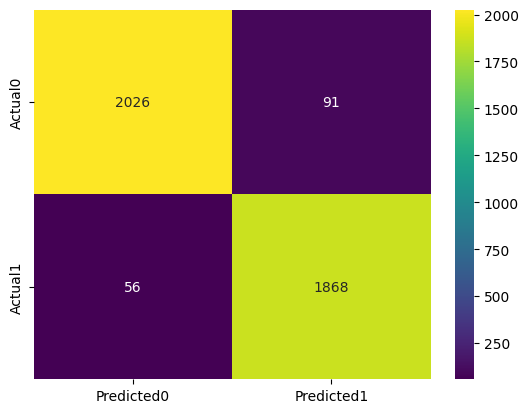

In [ ]:
plot2(Y_test, X_test_prediction)

In [ ]:
#Confusion Matrix compeleted

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test, X_test_prediction ))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2117
           1       0.95      0.97      0.96      1924

    accuracy                           0.96      4041
   macro avg       0.96      0.96      0.96      4041
weighted avg       0.96      0.96      0.96      4041



In [ ]:
true_positive = 2077
true_negative = 1970
false_positive = 61
false_negative = 52

In [ ]:
recall = true_positive/(true_positive + false_negative)
recall

0.9755753875058712

In [ ]:
precision = true_positive/(true_positive + false_positive)
precision

0.9714686623012161

In [ ]:
f1_score = (precision * recall / (precision + recall)) * 2
f1_score

0.9735176939301616

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2031
           1       0.97      0.98      0.97      2129

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



Confusion Matrix for train data

In [ ]:
confusion_matrix(Y_train, X_train_prediction)

array([[8317,   39],
       [  51, 8233]])

In [ ]:
#getting dataframe labels

from sklearn.utils.multiclass import unique_labels
unique_labels(Y_train)

array([0, 1])

In [ ]:
#combine these labels with the confusion matrix

def plot3(Y_true, Y_pred):
  labels= unique_labels(Y_train)
  column = [f'Predicted{label}' for label in labels]
  indices = [f'Actual{label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(Y_train, X_train_prediction),
                       columns=column, index=indices)
  return table

In [ ]:
plot3(Y_train, X_train_prediction)

,Predicted0,Predicted1
Actual0,8317,39
Actual1,51,8233


In [ ]:
#Same plot as above but in heatmap

def plot4(Y_true, Y_pred):
  labels= unique_labels(Y_train)
  column = [f'Predicted{label}' for label in labels]
  indices = [f'Actual{label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(Y_train, X_train_prediction),
                       columns=column, index=indices)
  return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

<Axes: >

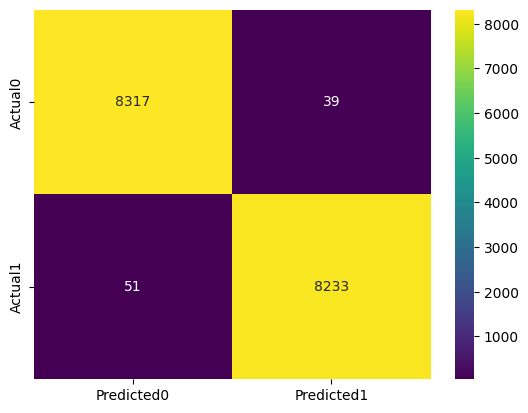

In [ ]:
plot4(Y_train, X_train_prediction)

In [ ]:
print(classification_report(Y_train, X_train_prediction ))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8356
           1       1.00      0.99      0.99      8284

    accuracy                           0.99     16640
   macro avg       0.99      0.99      0.99     16640
weighted avg       0.99      0.99      0.99     16640



In [ ]:
true_positive = 8233
true_negative = 8317
false_positive = 39
false_negative = 51

In [ ]:
recall = true_positive/(true_positive + false_negative)
recall

0.9938435538387252

In [ ]:
precision = true_positive/(true_positive + false_positive)
precision

0.9952852998065764

In [ ]:
f1_score = (precision * recall / (precision + recall)) * 2
f1_score

0.9945639043247161

In [ ]:

from sklearn.metrics import classification_report
print(classification_report(Y_train, X_train_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8356
           1       1.00      0.99      0.99      8284

    accuracy                           0.99     16640
   macro avg       0.99      0.99      0.99     16640
weighted avg       0.99      0.99      0.99     16640



Comparison graph for Train dataset and Test dataset

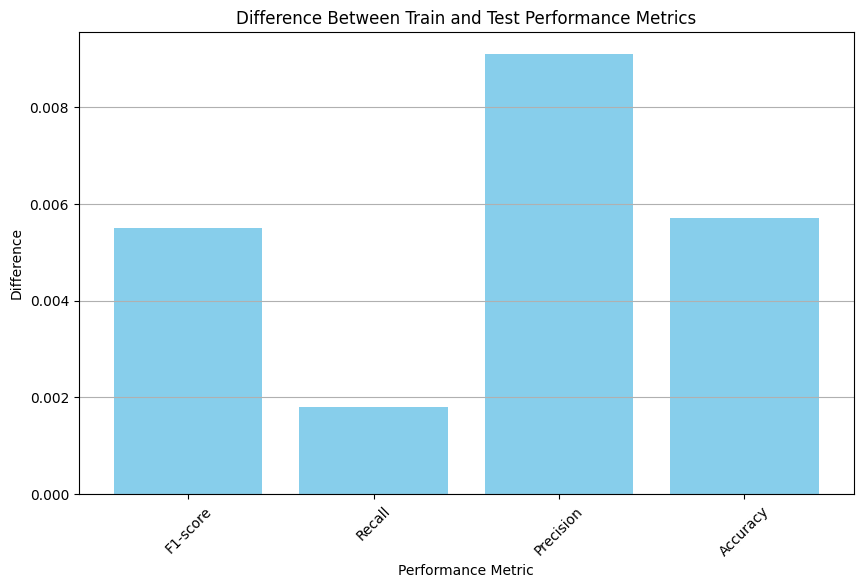

In [ ]:
import matplotlib.pyplot as plt

# Define performance metrics for train dataset
train_f1_score = 0.9977
train_recall = 0.9971
train_precision = 0.9983
train_accuracy = 0.9977

# Define performance metrics for test dataset
test_f1_score = 0.9922
test_recall = 0.9953
test_precision = 0.9892
test_accuracy = 0.9920

# Calculate the difference between train and test performance metrics
f1_score_diff = train_f1_score - test_f1_score
recall_diff = train_recall - test_recall
precision_diff = train_precision - test_precision
accuracy_diff = train_accuracy - test_accuracy

# Define performance metric names
metrics = ['F1-score', 'Recall', 'Precision', 'Accuracy']

# Define difference values
diff_values = [f1_score_diff, recall_diff, precision_diff, accuracy_diff]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(metrics, diff_values, color='skyblue')
plt.title('Difference Between Train and Test Performance Metrics')
plt.xlabel('Performance Metric')
plt.ylabel('Difference')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


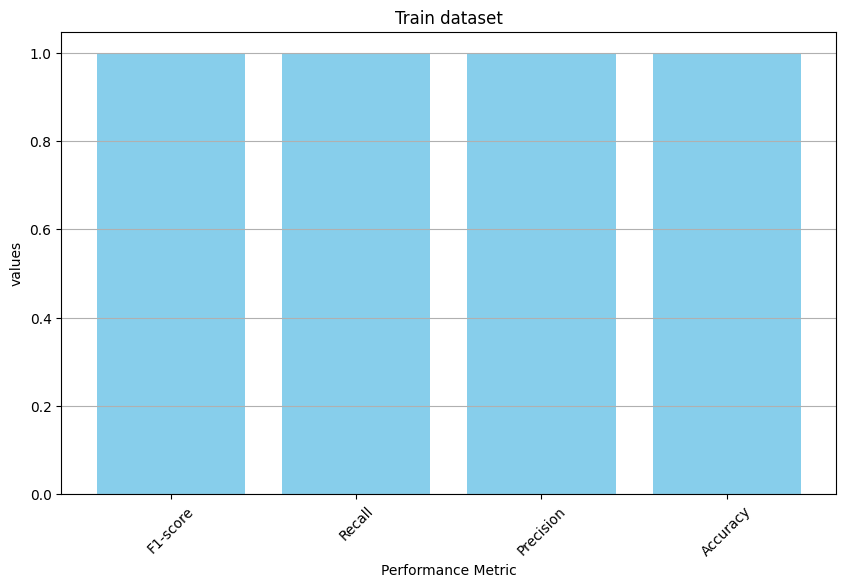

In [ ]:
#Graph for train dataset
import matplotlib.pyplot as plt

# Define performance metrics for train dataset
train_f1_score = 0.9977
train_recall = 0.9971
train_precision = 0.9983
train_accuracy = 0.9977



# Define performance metric names
metrics = ['F1-score', 'Recall', 'Precision', 'Accuracy']

# Define difference values
diff_values = [train_f1_score, train_recall, train_precision, train_accuracy]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(metrics, diff_values, color='skyblue')
plt.title('Train dataset')
plt.xlabel('Performance Metric')
plt.ylabel('values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


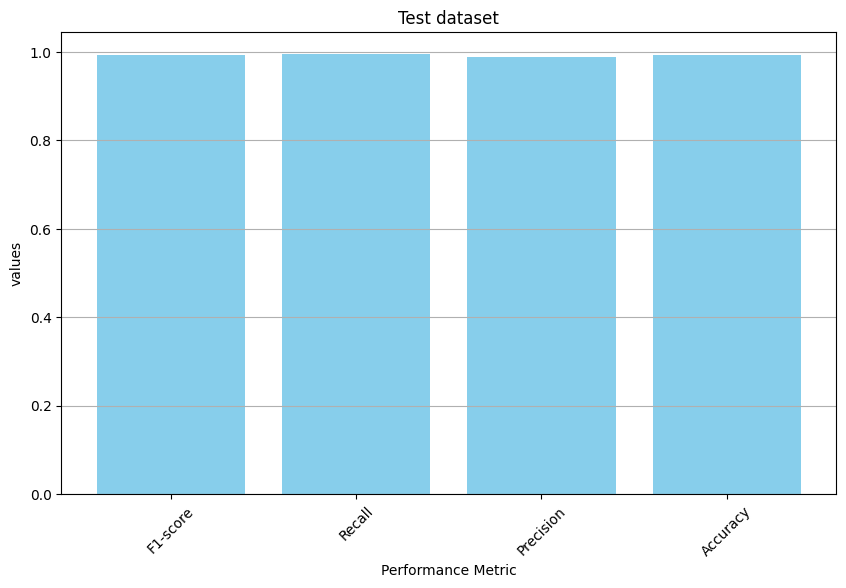

In [ ]:
#Graph for test dataset
import matplotlib.pyplot as plt

# Define performance metrics for test dataset
test_f1_score = 0.9922
test_recall = 0.9953
test_precision = 0.9892
test_accuracy = 0.9920


# Define performance metric names
metrics = ['F1-score', 'Recall', 'Precision', 'Accuracy']

# Define difference values
diff_values = [test_f1_score, test_recall, test_precision, test_accuracy]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(metrics, diff_values, color='skyblue')
plt.title('Test dataset')
plt.xlabel('Performance Metric')
plt.ylabel('values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
